In [1]:
import pandas as pd
import numpy as np
import sklearn as ak
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import utils
from dython.nominal import associations
import utilidades as utls
import random

In [2]:
df_raw= pd.read_csv('DatosDemograficos.csv')
df_aux= df_raw.copy()
df_raw.head(5)


,Marcatemporal,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,2020/06/12 8:06:26 a. m. GMT,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
1,2020/06/12 9:33:00 a. m. GMT,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,NaN
2,2020/06/12 9:33:52 a. m. GMT,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
3,2020/06/12 9:36:30 a. m. GMT,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas
4,2020/06/12 10:52:23 a. m. GMT,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,NaN


## Operaciones con las columnas

In [3]:
#elimino las columnas que no me interesan
# numero personas contiene un ordinalidad que sólo agrega complejidad y no valor. Creo que con tener GestionaEquipo es sufiente.
df_raw.drop(['Marcatemporal','NumeroPersonas'], axis=1,inplace=True)


In [4]:
print('cantidad de valores nulos: \n', df_raw.isnull().sum())

cantidad de valores nulos: 
 EDAD                   0
SEXO                   0
estudios               0
TIPOTRABAJO            0
FUNCIONDESARROLLADA    0
GestionaEquipos        0
dtype: int64


Nota: No tenemos que procesar valores perdidos (Nulos, Nan).

In [5]:
# renombro las columnas por nombres más cortos
# EDAD
# SEXO
# ESTUDIOS= ES
# TIPOtRABAJO = TT
# FunacionDesarrollada = FD
# GestionaEquipos = GE
header_list = ['EDAD','SEXO','ES','TT','FD','GE']
df_raw.columns=header_list
# df será el conjunto de datos con el que trabajaré
df= df_raw.copy()
df.head()


,EDAD,SEXO,ES,TT,FD,GE
0,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
1,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No
2,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
3,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí
4,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No


# Exploración y Análisis Análisis de los datos.

## Divido los datos en categoricos y numericos

In [6]:
#cols_cat=['SEXO', 'estudios', 'TIPOTRABAJO','FUNCIONDESARROLLADA', 'GestionaEquipos', 'NumeroPersonas']
cols_cat=['SEXO','ES', 'TT','FD','GE']
cols_num=['EDAD']
df_cat = df[cols_cat]
df_num = df[cols_num]
display(df_cat.head())
display(df_num.head())

,SEXO,ES,TT,FD,GE
0,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
1,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No
2,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
3,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí
4,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No


,EDAD
0,42
1,29
2,33
3,41
4,27


## Exploración

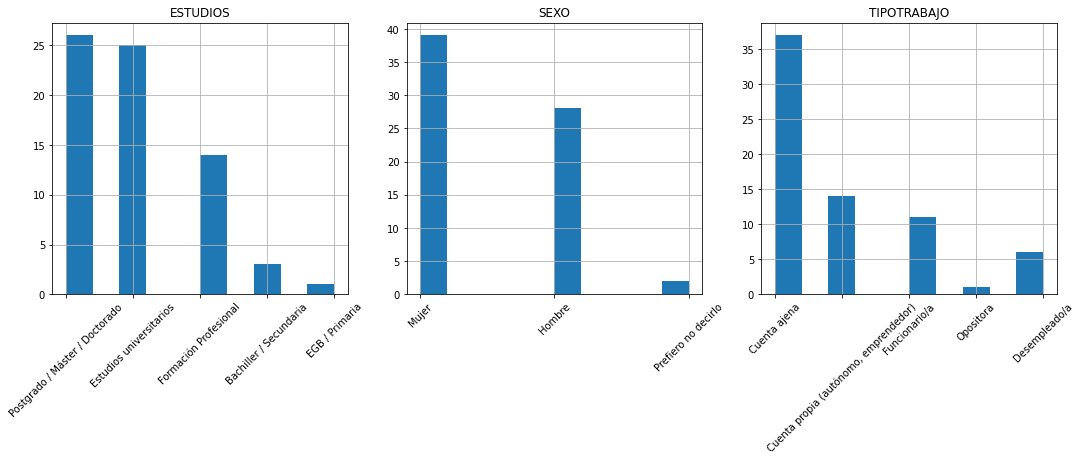

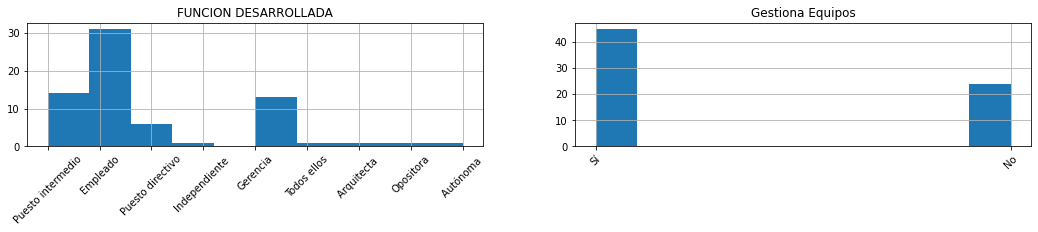

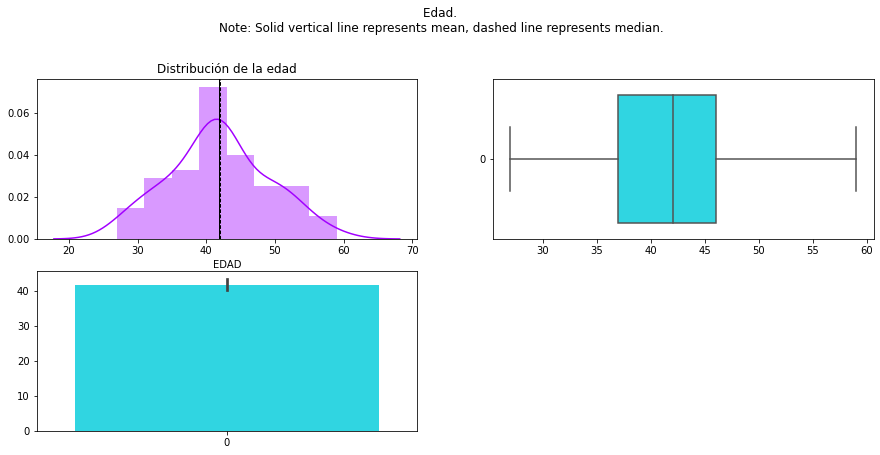

In [7]:
utls.show_exploration(df)

Nota: En cuanto a la edad no veo la presencia de valores atípicos o sesgo y el resto de columnas categoricas no presentan ninguna anormalidad que necesite ser tratada a priori.

## Análisis

## Verifico en que grado los datos se asocian.

Start |End | Classification
--- | --- | --- | --- | ---
(+-) 0.00|(+-) 0.09|Zero correlation.
(+-) 0.10|(+-) 0.19|Very weak correlation.
(+-) 0.20|(+-) 0.49|Weak correlation.
(+-) 0.50|(+-) 0.69|Moderate correlation.
(+-) 0.70|(+-) 0.84|Significant correlation.
(+-) 0.85|(+-) 0.95|Strong correlation.
(+-) 0.96|(+-) 1.0 |Perfect correlation.

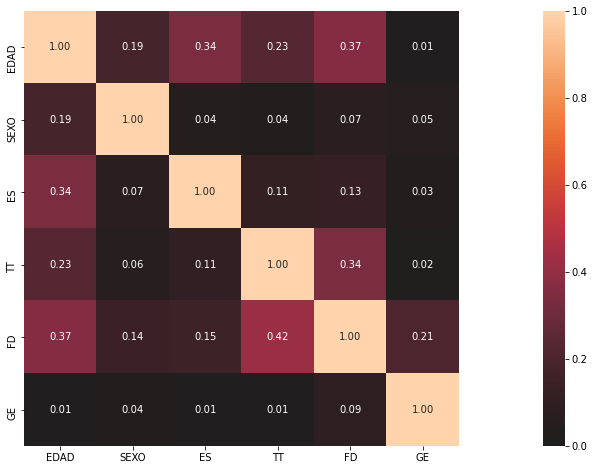

{'corr':           EDAD      SEXO        ES        TT        FD        GE
 EDAD  1.000000  0.187252  0.343052  0.228495  0.366606  0.009083
 SEXO  0.187252  1.000000  0.044284  0.036235  0.074421  0.047634
 ES    0.343052  0.070360  1.000000  0.112072  0.125524  0.027963
 TT    0.228495  0.056076  0.109161  1.000000  0.337222  0.022458
 FD    0.366606  0.142686  0.151474  0.417792  1.000000  0.206636
 GE    0.009083  0.038902  0.014374  0.011852  0.088019  1.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x215112c1f48>}

In [8]:
associations(df, theil_u=True, figsize=(30, 8))

Notas : 

1.) las correlaciones son bajas . Esto indica que los datos no son lineales y contienen estructuras más complejas.

2.) EDAD-FD  Tienen una correlación de 0.37

3.) EDAD-ESTUDIOS Tienen una correlación de 0.34

4.) TT-FD  Tienen una correlación de 0.34

5.) TT-EDAD tiene una correlación de 0.23 

6.) FD-TT tiene una correlaciones de 0.42

7.) FD-GE tiene una correlación de 0.21

5.) SEXO Y GE Tienen correlaciones bajas con las demás variables, eso significa que son caterísticas únicas.

## Seleciono 3 personas al azar

In [9]:
indices = [5,23,65]
print("Indices: {}".format(indices))
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Ejemplos escogidos:")
display(samples)

Indices: [5, 23, 65]
Ejemplos escogidos:


,EDAD,SEXO,ES,TT,FD,GE
0,52,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
1,40,Hombre,EGB / Primaria,"Cuenta propia (autónomo, emprendedor)",Gerencia,Sí
2,48,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No


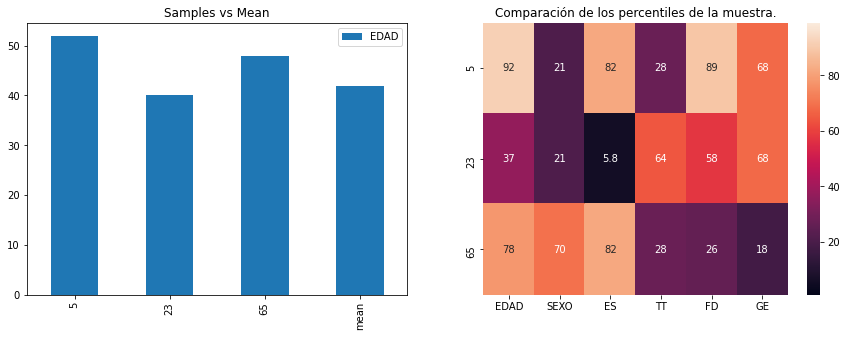

In [10]:

utls.show_sample_exploration(df,samples,indices)


Notas:
 
 1.) En el gráfico de la izquierda podemos ver la media de la edad de todos los datos vs la edad de cada muestra.

 2.) En el gráfico de la derecha podemos ver el percentil de la edad con respecto a las otras variables.


# Descubrir los patrones en los datos.

Uso el algoritmo:

Factor analysis for mixed data (FAMD) is a principal component method that combines principal component analysis (PCA) for continuous variables and multiple correspondence analysis (MCA) for categorical variables.

Debido a:

Que tengo una columna númerica 'EDAD' y el resto son categoricas.


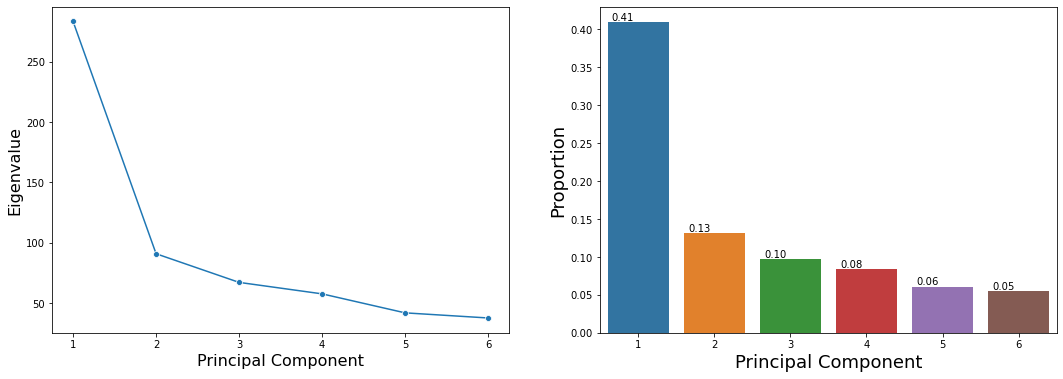

In [11]:
famd = prince.FAMD(n_components=8, n_iter=100, copy=True, check_input=True, engine='auto', random_state=1976)
famd = famd.fit(df)
utls.show_components(famd)


De la gráfica de arriba podemos ver que escogiendo los componentes 1 y 2 obtenemos que explican la mayor varianza del conjunto de datos.
Es decir, 54% son explicados por los componentes 1 y 2.

# Reducción de la dimensionalidad
## Reentreno el algoritmo sólo con dos componentes en vez de los 8 iniciales debido a que son los más representativos.

In [12]:
samples

,EDAD,SEXO,ES,TT,FD,GE
0,52,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí
1,40,Hombre,EGB / Primaria,"Cuenta propia (autónomo, emprendedor)",Gerencia,Sí
2,48,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No


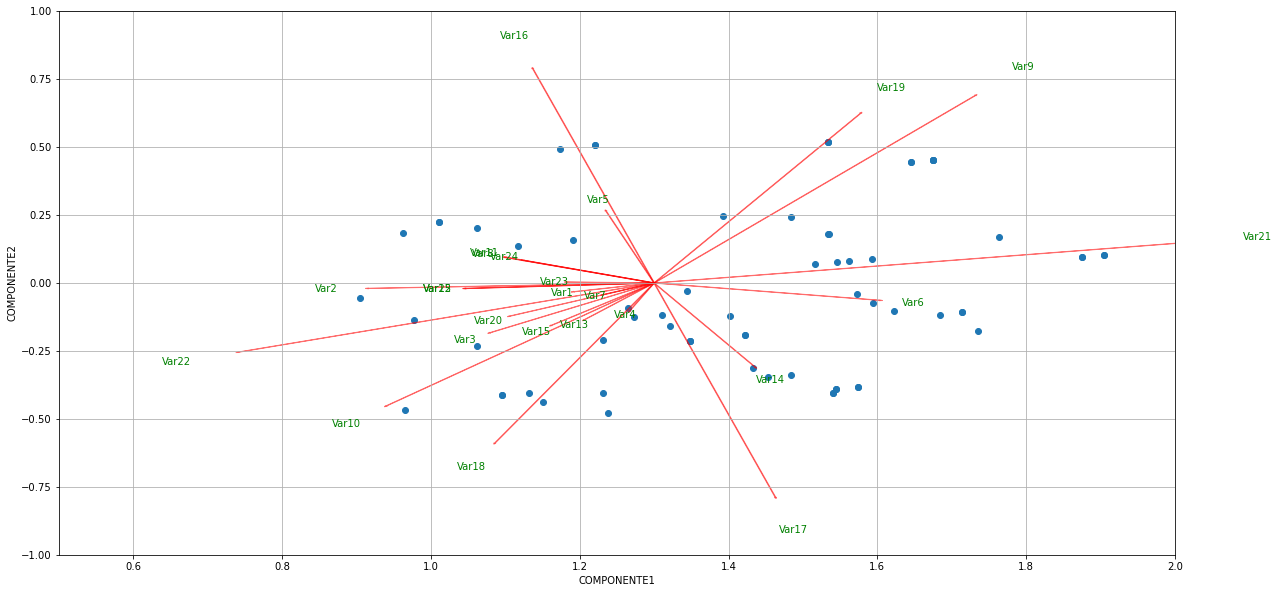

In [13]:
famd = prince.FAMD(n_components=2, n_iter=100, copy=True, check_input=True, engine='auto', random_state=1976)

famd = famd.fit(df)

df_reduced = famd.transform(df)

utls.pca_results(df_reduced.values,np.array(famd.column_correlations(df)))



Nota:

Podemos ver como cada variable se proyecta sobre cada componente

Los nombres Var 'X' se correponden con:

1.)EDAD

2.)ESTUDIOS_Bachiller / Secundaria

3.)ESTUDIOS_EGB / Primaria

4.)ESTUDIOS_Estudios universitarios

5.)ESTUDIOS_Formación Profesional

6.)ESTUDIOS_Postgrado / Máster / Doctorado

7.)FD_Arquitecta

8.)FD_Autónoma

9.)FD_Empleado

10.)FD_Gerencia

11.)FD_Independiente

12.)FD_Opositora

13.)FD_Puesto directivo

14.)FD_Puesto intermedio

15.)FD_Todos ellos

16.)GE_No

17.)GE_Sí

18.)SEXO_Hombre

19.)SEXO_Mujer

20.)SEXO_Prefiero no decirlo

21.)TT_Cuenta ajena

22.)TT_Cuenta propia (autónomo, emprendedor)

23.)TT_Desempleado/a

24.)TT_Funcionario/a

25.)TT_Opositora

## Gráfico donde se encuentra cada cliente en relación con los componentes.

No handles with labels found to put in legend.


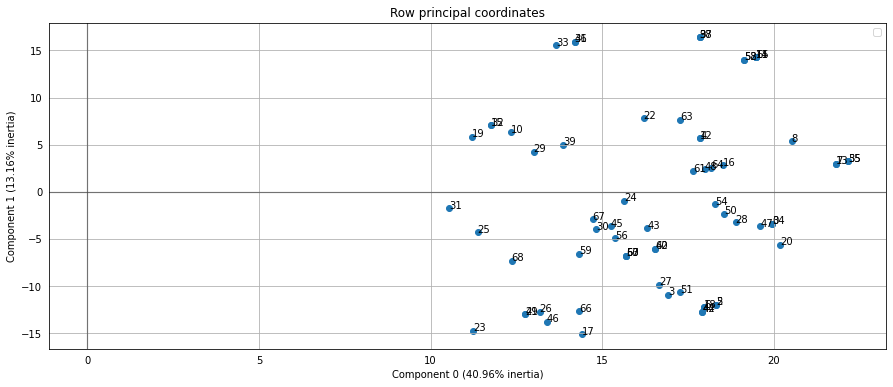

In [14]:
ax = famd.plot_row_coordinates(df, ax=None,figsize=(15, 6), x_component=0,
     y_component=1,
     labels=df.index,     
     #color_labels=['Component {}'.format(t) for t in [5,23,65]],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )
ax.get_figure().savefig('famd_row_coordinates.svg')

## Realizo la segmentación

In [15]:
from sklearn.cluster import KMeans

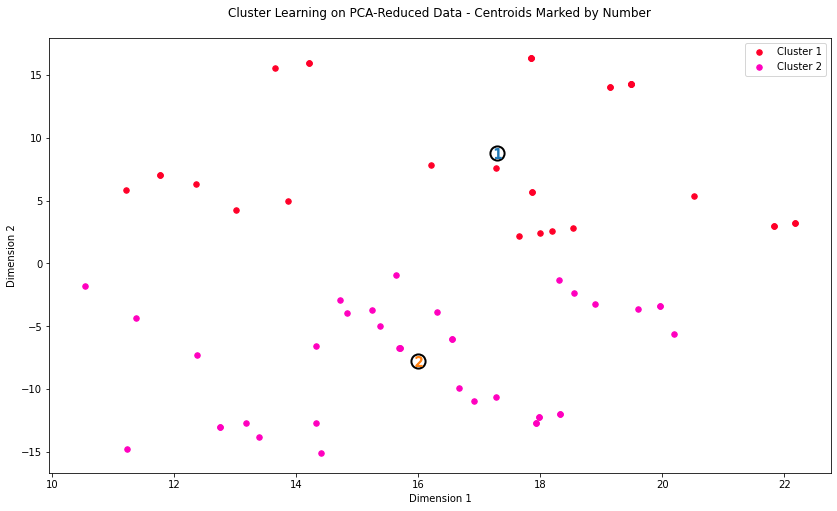

In [16]:

#nota : probe con varios tamñanos de n_clusters y el más optimo es 2
clusterer = KMeans(n_clusters=2, random_state=1976).fit(df_reduced)
preds = clusterer.predict(df_reduced)
centers = clusterer.cluster_centers_
#sample_preds = clusterer.predict(pca_samples)
df_reduced.columns=['Dimension 1','Dimension 2']
utls.cluster_results(df_reduced, preds, centers, None)

Nota:

Tenemos dos grupos de segmentos basados en las dos dimensiones.

# Asigno a cada cliente el segmento  al que pertenece.
nota: ver la última columna.

In [17]:
market = famd.inverse_transform (df_reduced)
market.columns= [col for col in famd.column_correlations(df).T.keys()]

df_market=  np.exp(pd.DataFrame(market,columns = list(market.keys())))

df_preds=pd.DataFrame({'Segment':preds }) 
df_segment_data = pd.concat([df_market, df_preds], axis = 1)

df_segment_data.head(5)

,EDAD,ES_Bachiller / Secundaria,ES_EGB / Primaria,ES_Estudios universitarios,ES_Formación Profesional,ES_Postgrado / Máster / Doctorado,FD_Arquitecta,FD_Autónoma,FD_Empleado,FD_Gerencia,...,GE_Sí,SEXO_Hombre,SEXO_Mujer,SEXO_Prefiero no decirlo,TT_Cuenta ajena,"TT_Cuenta propia (autónomo, emprendedor)",TT_Desempleado/a,TT_Funcionario/a,TT_Opositora,Segment
0,21.334324,4.982129e+04,1.536845,1.257219,181.000350,10.019102,303.350272,727.980272,970.171340,1.504963,...,3.677949,32.221468,1.270322,2942.477292,14.874274,3.074104,6.884082,1.147573,0.988632,1
1,51622.267819,6.716522e+00,1.368564,0.769396,40.530171,82.392147,98.605731,0.856467,428735.172004,0.944239,...,1.463034,1.678218,0.830990,7898.016741,1.289038,2.849934,11.070512,1.079432,0.953998,0
2,0.318328,1.603093e+06,1.565007,1.575375,236.327753,2.799079,312.898515,11694.882179,23.827704,1.831283,...,5.177266,102.951609,1.537829,848.735991,39.544323,2.875184,4.526343,1.168325,1.007601,1
3,0.371293,4.996695e+05,1.510956,1.515333,153.799799,2.634814,199.955471,5404.150081,19.709908,1.741755,...,4.531278,70.498391,1.482787,511.791470,29.255685,2.650984,4.050463,1.153942,1.006712,1
4,769.404158,2.162401e+02,1.393633,0.964149,52.915719,23.009754,101.695467,13.766007,10518.528992,1.149020,...,2.059543,5.363161,1.006022,2276.973883,3.427580,2.665401,7.277856,1.098953,0.972307,0


In [18]:
# Total number of records
n_records = df_segment_data.Segment.count()

# Number of records where individual's segment is 0
n_segment0 = df_segment_data[df_segment_data.Segment == 0].Segment.count()

# Number of records where individual's segment is 1
n_segment1 = df_segment_data[df_segment_data.Segment == 1].Segment.count()

# Percentage of customer whose segment is 0
percent_segment0 = float(n_segment0)*100/n_records 

# Percentage of customer whose segment is 1
percent_segment1 = float(n_segment1)*100/n_records 
# Print the results
print("Total number of records: {}".format(n_records))
print("Clientes en segmento 1: {}".format(n_segment0 ))
print("Clientes en segmento 2: {}".format(n_segment1))
print("% Clientes en segmento 1: {:.2f}%".format(percent_segment0))
print("% Clientes en segmento 2: {:.2f}%".format(percent_segment1))

Total number of records: 69
Clientes en segmento 1: 31
Clientes en segmento 2: 38
% Clientes en segmento 1: 44.93%
% Clientes en segmento 2: 55.07%


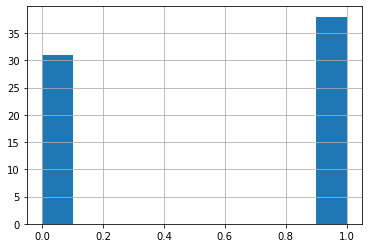

In [19]:
df_segment_data.Segment.hist()

In [20]:
df_segment_data.reset_index()
df_segment_data.to_csv('segmentos.csv')

In [21]:
df_aux['Segmento']= df_segment_data['Segment']
df_aux.head()

,Marcatemporal,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas,Segmento
0,2020/06/12 8:06:26 a. m. GMT,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas,1
1,2020/06/12 9:33:00 a. m. GMT,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,NaN,0
2,2020/06/12 9:33:52 a. m. GMT,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas,1
3,2020/06/12 9:36:30 a. m. GMT,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas,1
4,2020/06/12 10:52:23 a. m. GMT,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,NaN,0


In [22]:
df_aux.isnull().sum()

Marcatemporal           0
EDAD                    0
SEXO                    0
estudios                0
TIPOTRABAJO             0
FUNCIONDESARROLLADA     0
GestionaEquipos         0
NumeroPersonas         24
Segmento                0
dtype: int64

## Corrijo los valores perdidos en NumeroPersonas

In [23]:
utls.CountAll(df_aux)
utls.Fill_NaNs_Categorical(df_aux,'NumeroPersonas')
print('valores perdidos del conjunto de datos:',df_aux.isnull().sum() )


valores perdidos del conjunto de datos: Marcatemporal          0
EDAD                   0
SEXO                   0
estudios               0
TIPOTRABAJO            0
FUNCIONDESARROLLADA    0
GestionaEquipos        0
NumeroPersonas         0
Segmento               0
dtype: int64


# Visión General del conjunto de datos

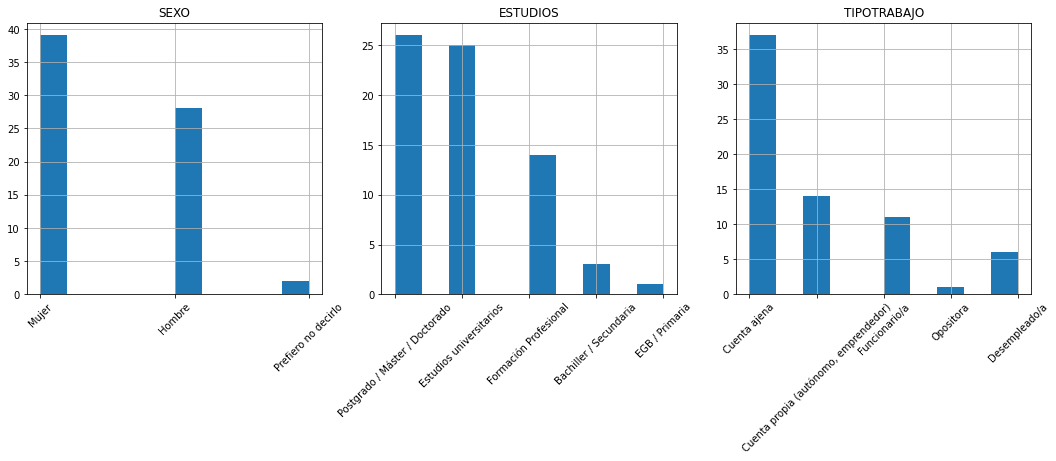

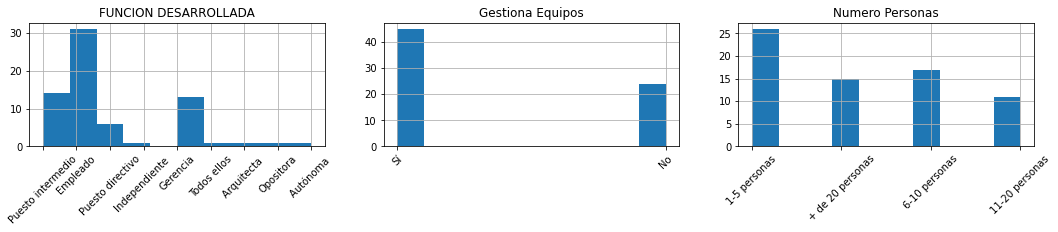

In [24]:
utls.show_exploration_segment(df_aux)

## ¿Cómo es el segmento 0?

Descripción: Probablemente mujer, con estudios minimos formación profesional, que en su mayoria trabaja por cuenta ajena, desarrollando funciones de empleado donde no suele gestionar equipos pero en caso de hacerlo suele estar entre 1 y 5 personas. Mirar las graficas de abajo.

De un total de 69 encuestados hay 31 que pertenecen al segmento 0.

Representan el 44.93%


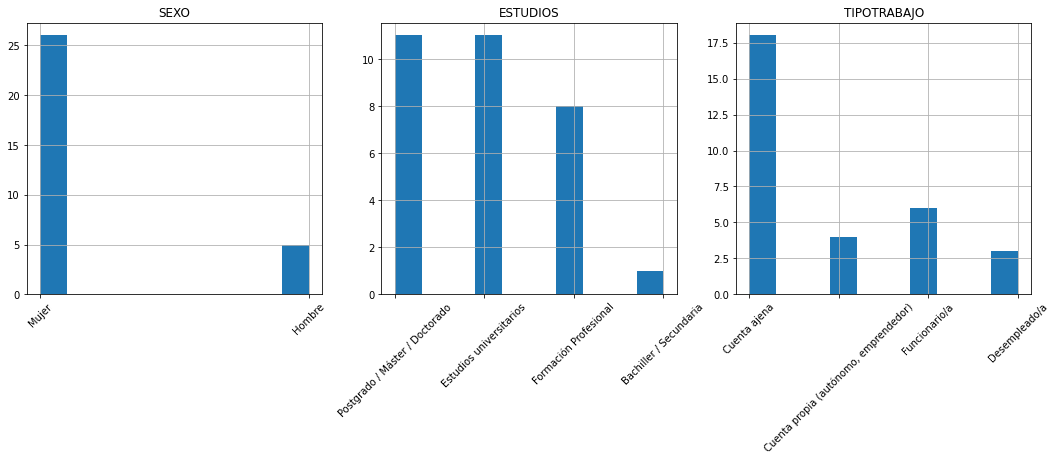

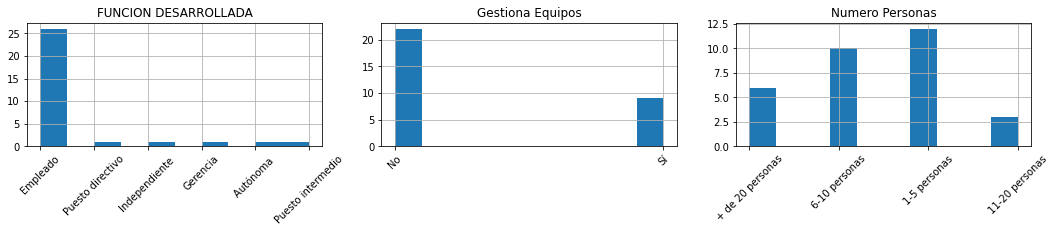

In [25]:
en_filtro=df_aux['Segmento']==0
df_segment0 = df_aux[en_filtro]
utls.show_exploration_segment(df_segment0)

## ¿Cómo es el segmento 1?

Descripción: Probablemente hombre, estudios minimos EGB/Primaria trabaja como cuenta ajena aunque pudiera ser autonomo, suele desarrollar funciones de Puesto Intermedio, Puesto Directivo y Gerencia en equipos de 1 a 5 personas o probablemente más de 20 personas. Mirar las graficas de abajo.

De un total de 69 encuestados hay 38 que pertenecen al segmento 1.

Representan el 55.07%

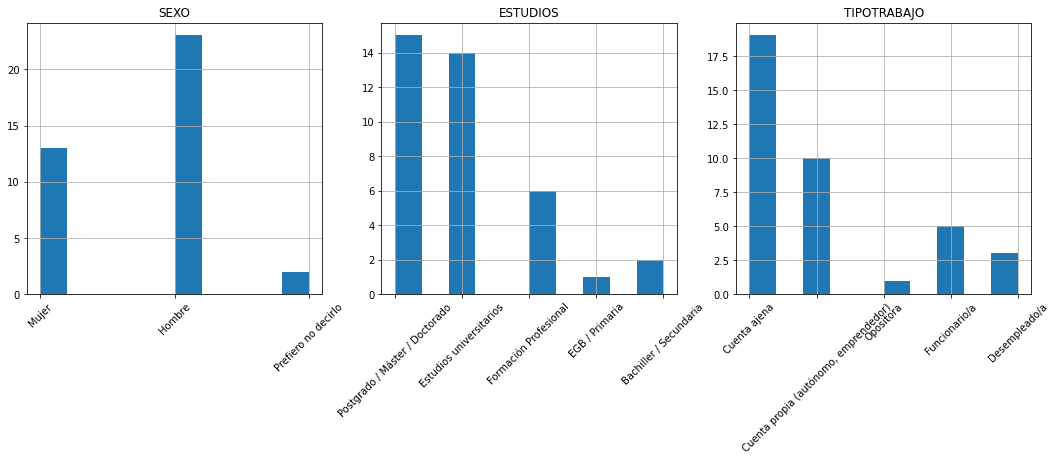

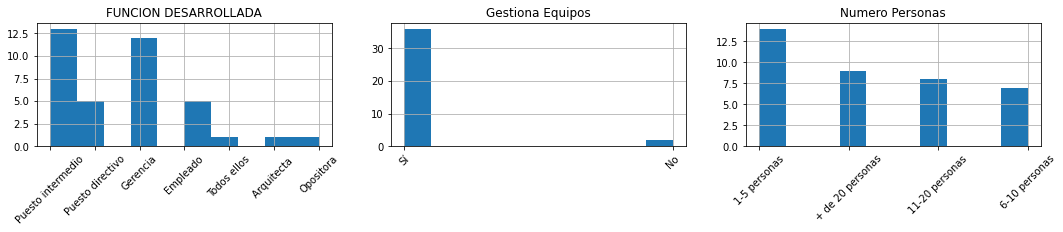

In [26]:
en_filtro=df_aux['Segmento']==1
df_segment1 = df_aux[en_filtro]
utls.show_exploration_segment(df_segment1)

In [27]:
df_aux.to_csv('procesados.csv')

# Se agrega más información para conocer los intereses y opiniones de cada segmento.
  Esta información es: cuanto esta dispuesto a pagar, cuanto a pagado, temas de interes, cantidad de sesiones que ha recibido y si a usado o no los servicios coaching

In [28]:
df=None
df=utls.agregarNuevasVariables(df_aux)
df.drop(['Marcatemporal'], axis=1,inplace=True)
display(df.head(5))

,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas,Segmento,DispuestoPagar,coaching,Pagado,TemaInteres,sessiones
0,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas,1,Entre 10-40,pensado,NaN,Estilo de vida saludable.| Liderazgo y confian...,NaN
1,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,+ de 20 personas,0,Entre 10-40,Si de forma puntual,Entre 45-70,Negocios y vida laboral.| Conflicto laboral,Entre 1-3.
2,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas,1,Entre 10-40,los uso con frecuencia,Mayor de 100,Estilo de vida saludable.| Liderazgo y confian...,Mayor de 10
3,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas,1,Entre 10-40,los uso con frecuencia,Entre 10-40,Negocios y vida laboral.| Gestión de equipos,Mayor de 10
4,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,6-10 personas,0,Entre 10-40,no me lo he planteado,Entre 75-100,Liderazgo y confianza.| Gestión del tiempo| Ge...,Mayor de 10


### Verifico la presencia de valores perdidos.

In [29]:
df.isnull().sum()

EDAD                    0
SEXO                    0
estudios                0
TIPOTRABAJO             0
FUNCIONDESARROLLADA     0
GestionaEquipos         0
NumeroPersonas          0
Segmento                0
DispuestoPagar         28
coaching                2
Pagado                 46
TemaInteres            22
sessiones              37
dtype: int64

### Imputo los valores perdidos.

In [30]:
#relleno los valores faltantes con el método
utls.CountAll(df)

utls.Fill_NaNs_Categorical(df,'DispuestoPagar')
print('valores perdidos DispuestoPagar:',df['DispuestoPagar'].isnull().sum()) #<- total de valores perdidos en la columna, da cero

utls.Fill_NaNs_Categorical(df,'coaching')
print('valores perdidos Coaching:',df['coaching'].isnull().sum() )

utls.Fill_NaNs_Categorical(df,'Pagado')
print('valores perdidos Pagado:',df['Pagado'].isnull().sum() )

utls.Fill_NaNs_Categorical(df,'TemaInteres')
print('valores perdidos TemaInteres:',df['TemaInteres'].isnull().sum() )

utls.Fill_NaNs_Categorical(df,'sessiones')
print('valores perdidos sessiones:',df['sessiones'].isnull().sum() )

df.isnull().sum()

valores perdidos DispuestoPagar: 0
valores perdidos Coaching: 0
valores perdidos Pagado: 0
valores perdidos TemaInteres: 0
valores perdidos sessiones: 0


EDAD                   0
SEXO                   0
estudios               0
TIPOTRABAJO            0
FUNCIONDESARROLLADA    0
GestionaEquipos        0
NumeroPersonas         0
Segmento               0
DispuestoPagar         0
coaching               0
Pagado                 0
TemaInteres            0
sessiones              0
dtype: int64

## Comportamiento del segmento 0

### Conclusiones:

los clientes del segmento 0:

1.) En su mayoria estarían dispuesto a pagar entre 10 y 40 euros.

2.) No suele usar con frecuencia el coaching y cuando los usa esta entre 1-3 sesiones.

3.) Lo minimo que ha pagado esta entre 45 y 70 euros. 

4.) Sus tema de interes son:  gestion de equipos, gestión del tiempo y habilidades de comunicación.



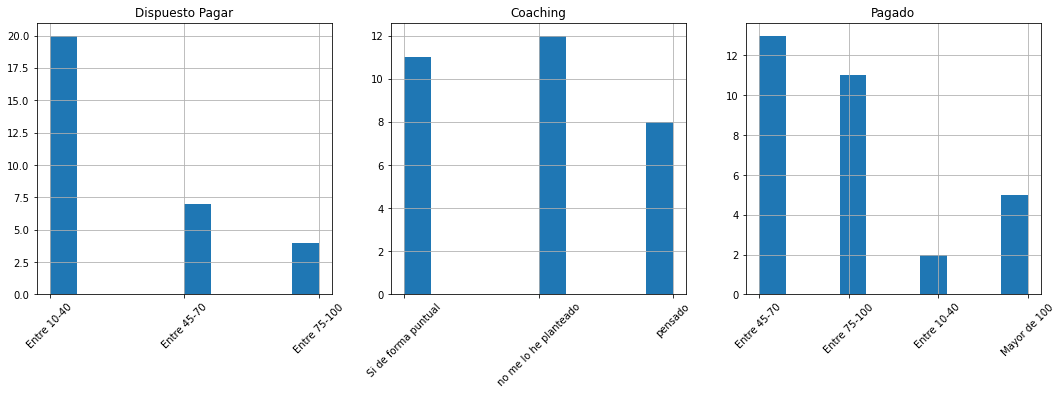

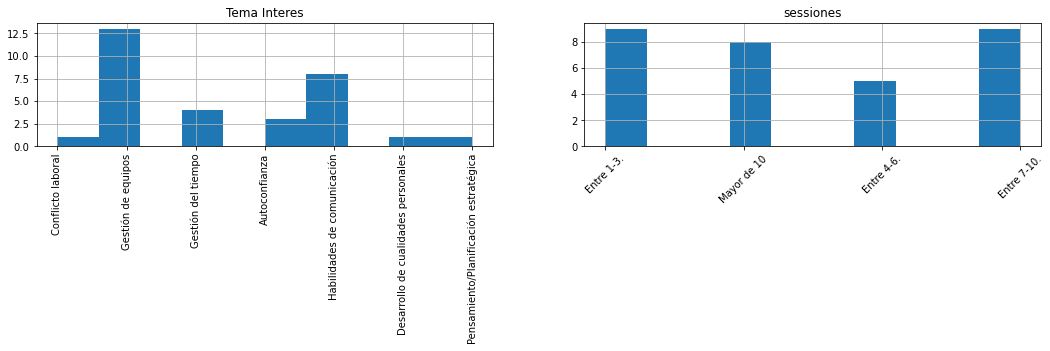

In [31]:
utls.show_comportamiento(df,0)

## Comportamiento del segmento 1

### Conclusiones:

los clientes del segmento 1:

1.) En su mayoria estarían dispuesto a pagar entre 10 y 40 euros.

2.) Suelen usar con frecuencia el coaching y cuando los usa, en su mayoria consume más de 10 sesiones.

3.) Lo minimo que ha pagado esta entre 45 y 70 euros. 

4.) Sus tema de interes son:  gestion de equipos y gestión del tiempo.

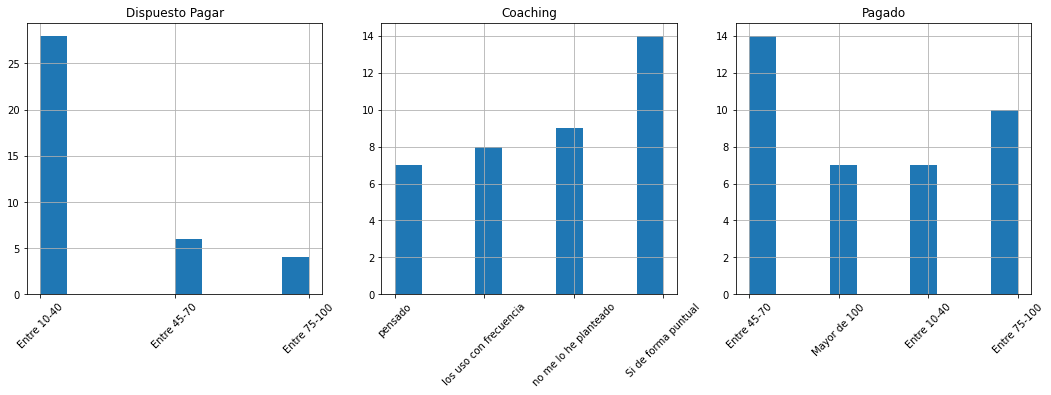

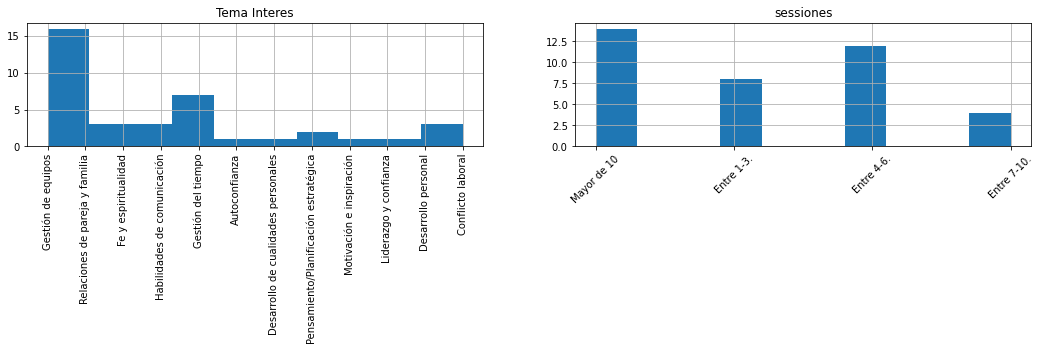

In [32]:
utls.show_comportamiento(df,1)